## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """
    Try to build your own model
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="tanh")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
"""
Compile your model
"""
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="mean_squared_error", metrics=["accuracy"], optimizer=optimizer)

In [6]:
"""
Set epochs
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 10s 208us/step - loss: 0.0882 - acc: 0.1901 - val_loss: 0.0865 - val_acc: 0.2418
Epoch 2/500
50000/50000 [==============================] - 10s 192us/step - loss: 0.0854 - acc: 0.2581 - val_loss: 0.0841 - val_acc: 0.2756
Epoch 3/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.0834 - acc: 0.2869 - val_loss: 0.0825 - val_acc: 0.3027
Epoch 4/500
50000/50000 [==============================] - 10s 193us/step - loss: 0.0819 - acc: 0.3105 - val_loss: 0.0812 - val_acc: 0.3257
Epoch 5/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.0806 - acc: 0.3311 - val_loss: 0.0800 - val_acc: 0.3432
Epoch 6/500
50000/50000 [==============================] - 10s 196us/step - loss: 0.0795 - acc: 0.3455 - val_loss: 0.0790 - val_acc: 0.3500
Epoch 7/500
50000/50000 [==============================] - 10s 193us/step - loss: 0.0785 - acc: 0.3564 - val_lo

Epoch 59/500
50000/50000 [==============================] - 11s 215us/step - loss: 0.0605 - acc: 0.5367 - val_loss: 0.0644 - val_acc: 0.4909
Epoch 60/500
50000/50000 [==============================] - 11s 210us/step - loss: 0.0602 - acc: 0.5382 - val_loss: 0.0642 - val_acc: 0.4917
Epoch 61/500
50000/50000 [==============================] - 10s 208us/step - loss: 0.0600 - acc: 0.5406 - val_loss: 0.0641 - val_acc: 0.4949
Epoch 62/500
50000/50000 [==============================] - 10s 210us/step - loss: 0.0598 - acc: 0.5433 - val_loss: 0.0641 - val_acc: 0.4945
Epoch 63/500
50000/50000 [==============================] - 10s 208us/step - loss: 0.0596 - acc: 0.5456 - val_loss: 0.0636 - val_acc: 0.4995
Epoch 64/500
50000/50000 [==============================] - 11s 211us/step - loss: 0.0593 - acc: 0.5490 - val_loss: 0.0637 - val_acc: 0.4987
Epoch 65/500
50000/50000 [==============================] - 11s 214us/step - loss: 0.0591 - acc: 0.5508 - val_loss: 0.0633 - val_acc: 0.4996
Epoch 66/500


Epoch 117/500
50000/50000 [==============================] - 13s 268us/step - loss: 0.0472 - acc: 0.6634 - val_loss: 0.0614 - val_acc: 0.5271
Epoch 118/500
50000/50000 [==============================] - 13s 269us/step - loss: 0.0468 - acc: 0.6662 - val_loss: 0.0616 - val_acc: 0.5269 - loss: 0.0468 -
Epoch 119/500
50000/50000 [==============================] - 14s 272us/step - loss: 0.0468 - acc: 0.6664 - val_loss: 0.0615 - val_acc: 0.5268
Epoch 120/500
50000/50000 [==============================] - 13s 268us/step - loss: 0.0466 - acc: 0.6676 - val_loss: 0.0612 - val_acc: 0.5296
Epoch 121/500
50000/50000 [==============================] - 13s 269us/step - loss: 0.0464 - acc: 0.6706 - val_loss: 0.0619 - val_acc: 0.5270
Epoch 122/500
50000/50000 [==============================] - 14s 274us/step - loss: 0.0461 - acc: 0.6722 - val_loss: 0.0613 - val_acc: 0.5323
Epoch 123/500
50000/50000 [==============================] - 14s 278us/step - loss: 0.0459 - acc: 0.6736 - val_loss: 0.0627 - val_a

50000/50000 [==============================] - 13s 250us/step - loss: 0.0353 - acc: 0.7636 - val_loss: 0.0648 - val_acc: 0.5204
Epoch 175/500
50000/50000 [==============================] - 12s 246us/step - loss: 0.0350 - acc: 0.7650 - val_loss: 0.0642 - val_acc: 0.5269
Epoch 176/500
50000/50000 [==============================] - 12s 247us/step - loss: 0.0349 - acc: 0.7665 - val_loss: 0.0698 - val_acc: 0.4848
Epoch 177/500
50000/50000 [==============================] - 13s 256us/step - loss: 0.0350 - acc: 0.7645 - val_loss: 0.0646 - val_acc: 0.5249
Epoch 178/500
50000/50000 [==============================] - 13s 252us/step - loss: 0.0346 - acc: 0.7684 - val_loss: 0.0652 - val_acc: 0.5172
Epoch 179/500
50000/50000 [==============================] - 13s 251us/step - loss: 0.0344 - acc: 0.7681 - val_loss: 0.0664 - val_acc: 0.5172
Epoch 180/500
50000/50000 [==============================] - 12s 246us/step - loss: 0.0342 - acc: 0.7709 - val_loss: 0.0657 - val_acc: 0.5222
Epoch 181/500
50000/

Epoch 232/500
50000/50000 [==============================] - 14s 273us/step - loss: 0.0254 - acc: 0.8392 - val_loss: 0.0670 - val_acc: 0.5309
Epoch 233/500
50000/50000 [==============================] - 12s 248us/step - loss: 0.0246 - acc: 0.8445 - val_loss: 0.0710 - val_acc: 0.5051
Epoch 234/500
50000/50000 [==============================] - 12s 246us/step - loss: 0.0248 - acc: 0.8431 - val_loss: 0.0675 - val_acc: 0.5286
Epoch 235/500
50000/50000 [==============================] - 12s 248us/step - loss: 0.0247 - acc: 0.8444 - val_loss: 0.0686 - val_acc: 0.5216
Epoch 236/500
50000/50000 [==============================] - 12s 248us/step - loss: 0.0245 - acc: 0.8445 - val_loss: 0.0688 - val_acc: 0.5165
Epoch 237/500
50000/50000 [==============================] - 12s 249us/step - loss: 0.0241 - acc: 0.8468 - val_loss: 0.0699 - val_acc: 0.5175
Epoch 238/500
50000/50000 [==============================] - 12s 250us/step - loss: 0.0244 - acc: 0.8453 - val_loss: 0.0683 - val_acc: 0.5260
Epoch 

Epoch 290/500
50000/50000 [==============================] - 10s 193us/step - loss: 0.0186 - acc: 0.8848 - val_loss: 0.0761 - val_acc: 0.4988
Epoch 291/500
50000/50000 [==============================] - 10s 192us/step - loss: 0.0173 - acc: 0.8939 - val_loss: 0.0739 - val_acc: 0.5032
Epoch 292/500
50000/50000 [==============================] - 10s 194us/step - loss: 0.0174 - acc: 0.8931 - val_loss: 0.0712 - val_acc: 0.5241
Epoch 293/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.0172 - acc: 0.8947 - val_loss: 0.0723 - val_acc: 0.5197
Epoch 294/500
50000/50000 [==============================] - 10s 196us/step - loss: 0.0171 - acc: 0.8958 - val_loss: 0.0706 - val_acc: 0.5261
Epoch 295/500
50000/50000 [==============================] - 10s 191us/step - loss: 0.0165 - acc: 0.8991 - val_loss: 0.0718 - val_acc: 0.5221
Epoch 296/500
50000/50000 [==============================] - 10s 193us/step - loss: 0.0166 - acc: 0.8991 - val_loss: 0.0755 - val_acc: 0.4947
Epoch 2

50000/50000 [==============================] - 14s 278us/step - loss: 0.0124 - acc: 0.9230 - val_loss: 0.0782 - val_acc: 0.4944
Epoch 348/500
50000/50000 [==============================] - 14s 273us/step - loss: 0.0130 - acc: 0.9203 - val_loss: 0.0738 - val_acc: 0.5242
Epoch 349/500
50000/50000 [==============================] - 14s 273us/step - loss: 0.0121 - acc: 0.9259 - val_loss: 0.0732 - val_acc: 0.5269
Epoch 350/500
50000/50000 [==============================] - 14s 284us/step - loss: 0.0134 - acc: 0.9170 - val_loss: 0.0728 - val_acc: 0.5296
Epoch 351/500
50000/50000 [==============================] - 14s 281us/step - loss: 0.0122 - acc: 0.9244 - val_loss: 0.0751 - val_acc: 0.5164
Epoch 352/500
50000/50000 [==============================] - 14s 284us/step - loss: 0.0119 - acc: 0.9260 - val_loss: 0.0733 - val_acc: 0.5233
Epoch 353/500
50000/50000 [==============================] - 14s 281us/step - loss: 0.0116 - acc: 0.9274 - val_loss: 0.0740 - val_acc: 0.5224
Epoch 354/500
50000/

Epoch 405/500
50000/50000 [==============================] - 13s 264us/step - loss: 0.0094 - acc: 0.9390 - val_loss: 0.0751 - val_acc: 0.5217 0s - loss: 0.0094
Epoch 406/500
50000/50000 [==============================] - 13s 264us/step - loss: 0.0095 - acc: 0.9384 - val_loss: 0.0754 - val_acc: 0.5213
Epoch 407/500
50000/50000 [==============================] - 13s 268us/step - loss: 0.0093 - acc: 0.9391 - val_loss: 0.0754 - val_acc: 0.5233
Epoch 408/500
50000/50000 [==============================] - 13s 267us/step - loss: 0.0095 - acc: 0.9388 - val_loss: 0.0749 - val_acc: 0.5213
Epoch 409/500
50000/50000 [==============================] - 13s 268us/step - loss: 0.0094 - acc: 0.9393 - val_loss: 0.0749 - val_acc: 0.5233
Epoch 410/500
50000/50000 [==============================] - 13s 265us/step - loss: 0.0093 - acc: 0.9394 - val_loss: 0.0749 - val_acc: 0.5254
Epoch 411/500
50000/50000 [==============================] - 13s 270us/step - loss: 0.0092 - acc: 0.9395 - val_loss: 0.0765 - val_

50000/50000 [==============================] - 13s 263us/step - loss: 0.0081 - acc: 0.9456 - val_loss: 0.0765 - val_acc: 0.5190
Epoch 463/500
50000/50000 [==============================] - 14s 287us/step - loss: 0.0081 - acc: 0.9454 - val_loss: 0.0765 - val_acc: 0.5195
Epoch 464/500
50000/50000 [==============================] - 14s 289us/step - loss: 0.0080 - acc: 0.9459 - val_loss: 0.0762 - val_acc: 0.5209
Epoch 465/500
50000/50000 [==============================] - 15s 292us/step - loss: 0.0079 - acc: 0.9460 - val_loss: 0.0764 - val_acc: 0.5188
Epoch 466/500
50000/50000 [==============================] - 15s 291us/step - loss: 0.0080 - acc: 0.9459 - val_loss: 0.0762 - val_acc: 0.5214
Epoch 467/500
50000/50000 [==============================] - 14s 286us/step - loss: 0.0080 - acc: 0.9460 - val_loss: 0.0769 - val_acc: 0.5190
Epoch 468/500
50000/50000 [==============================] - 14s 286us/step - loss: 0.0079 - acc: 0.9462 - val_loss: 0.0790 - val_acc: 0.5070
Epoch 469/500
50000/

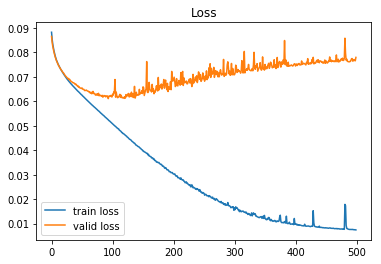

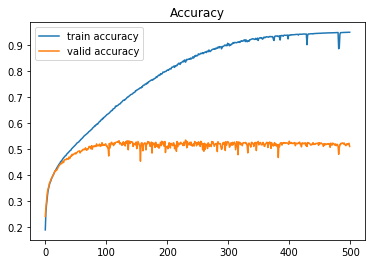

In [8]:
import matplotlib.pyplot as plt
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()